In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import the dataset
dataset=pd.read_excel('E-com_Data.xlsx')
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [3]:
dataset.shape

(537979, 12)

In [4]:
#information of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [5]:
# number of unique
dataset.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        3479
Price                16327
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [6]:
#check missing data
dataset.isnull().sum()

CustomerID           133790
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529634
Reason of return     537976
Sold as set          537979
dtype: int64

In [7]:
#total number of % missing values
dataset.isnull().sum()/len(dataset)*100

CustomerID            24.869000
Item Code              0.000000
InvoieNo               0.000000
Date of purchase       0.000000
Quantity               0.000000
Time                   0.000000
price per Unit         0.000000
Price                  0.000000
Shipping Location      0.000000
Cancelled_status      98.448824
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

In [8]:
#duplicate data
dataset.loc[dataset.duplicated(),:]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
61202,4043.0,15819,403353,2017-12-02,1,14:07:00,447.0,447.0,Location 36,NaN,NaN,NaN
70587,3984.0,15422,405579,2017-12-09,24,14:09:00,77.0,1848.0,Location 36,NaN,NaN,NaN
84823,3828.0,14519,398139,2017-10-31,1,14:04:00,85.0,85.0,Location 36,NaN,NaN,NaN
120521,3384.0,15121,380588,2017-06-11,1,11:37:00,298.0,298.0,Location 36,NaN,NaN,NaN
182786,2607.0,15660,393225,2017-09-30,1,12:31:00,484.0,484.0,Location 36,NaN,NaN,NaN
248215,1852.0,15614,382863,2017-07-02,12,09:53:00,221.0,2652.0,Location 36,NaN,NaN,NaN
310310,1291.0,13958,368695,2017-02-14,2,16:17:00,298.0,596.0,Location 36,NaN,NaN,NaN
325175,1076.0,2020,405755,2017-12-13,12,15:48:00,58.0,696.0,Location 36,NaN,NaN,NaN
414854,NaN,2020,386281,2017-07-31,1,17:09:00,104.0,104.0,Location 36,NaN,NaN,NaN


In [9]:
#drop duplicate data
dataset=dataset.drop_duplicates(ignore_index=True)

In [10]:
dataset.shape

(537970, 12)

In [11]:
dataset.isnull().sum()

CustomerID           133789
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529625
Reason of return     537967
Sold as set          537970
dtype: int64

In [12]:
#we will drop missing customerID data row wise
dataset=dataset.dropna(subset=['CustomerID'])

In [13]:
dataset.shape

(404181, 12)

In [14]:
dataset['Date']=pd.to_datetime(dataset['Date of purchase'])

In [15]:
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Date
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN,2017-10-29
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN,2017-10-05
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN,2017-10-12
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN,2017-08-22
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN,2017-10-10


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item Code          404181 non-null  object        
 2   InvoieNo           404181 non-null  int64         
 3   Date of purchase   404181 non-null  datetime64[ns]
 4   Quantity           404181 non-null  int64         
 5   Time               404181 non-null  object        
 6   price per Unit     404181 non-null  float64       
 7   Price              404181 non-null  float64       
 8   Shipping Location  404181 non-null  object        
 9   Cancelled_status   8183 non-null    float64       
 10  Reason of return   0 non-null       object        
 11  Sold as set        0 non-null       float64       
 12  Date               404181 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(2), 

In [17]:
dataset=dataset.iloc[:,0:9]
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1


In [18]:
#Objective : Build an unsupervised learning model which can enable your company to 
#analyze their customers via RFM (Recency, Frequency and Monetary value) approach.

#Recency=Latest Date-Last Invoice Date
#Frequency=no. of invoice or transaction done by customer
#Monetary=sum of amount purchased by a customer

max(dataset['Date of purchase'])

Timestamp('2017-12-19 00:00:00')

In [19]:
#last date=2017-12-19
#latest date=2017-12-20

In [20]:
import datetime as dt
latest_date=dt.datetime(2017,12,20)

In [21]:
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [22]:
dataset['Date']=dataset['Date']=pd.to_datetime(dataset['Date of purchase'])
dataset['Date_1']=dataset['Date']

In [23]:
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Date,Date_1
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,2017-10-29,2017-10-29
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,2017-10-05,2017-10-05
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,2017-10-12,2017-10-12
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,2017-08-22,2017-08-22
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,2017-10-10,2017-10-10


In [24]:
dataset['CustomerID'].nunique()

4349

In [25]:
# Create RFM model by each customer

RFMScore = dataset.groupby('CustomerID').agg({'Date_1': lambda x : (latest_date - x.max()).days,
                                            'Date': lambda x : x.count(),
                                            'Price' : lambda x : x.sum()}).reset_index()
RFMScore.head()

,CustomerID,Date_1,Date,Price
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0


In [26]:
RFMScore.columns

Index(['CustomerID', 'Date_1', 'Date', 'Price'], dtype='object')

In [27]:
RFMScore['Date'] = RFMScore['Date'].astype(int)
RFMScore.rename(columns = {'Date_1' : "Recency", "Date": " Frequency","Price":"Monetary"},
               inplace = True)

RFMScore.head()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0


In [28]:
RFMScore.columns

Index(['CustomerID', 'Recency', ' Frequency', 'Monetary'], dtype='object')

In [29]:
RFMScore.shape

(4349, 4)

In [30]:
# EDA Part : 
RFMScore.describe()

,CustomerID,Recency,Frequency,Monetary
count,4349.000000,4349.000000,4349.000000,4.349000e+03
mean,2187.093355,93.299379,92.936537,2.299380e+05
std,1261.544319,100.701315,232.086935,8.572589e+05
min,2.000000,1.000000,1.000000,-5.037200e+04
25%,1095.000000,18.000000,17.000000,3.814800e+04
50%,2186.000000,51.000000,42.000000,8.365500e+04
75%,3279.000000,144.000000,101.000000,2.056120e+05
max,4372.000000,381.000000,7970.000000,3.553619e+07


In [31]:
# split the data into four segments using quantile method
quantiles = RFMScore.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [32]:
quantiles

{'CustomerID': {0.25: 1095.0, 0.5: 2186.0, 0.75: 3279.0},
 'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 ' Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [33]:
# Create own function to define R, F and M Segment

def RScoring(x,p,d):
    if x<= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else :
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75] :
        return 2
    else :
        return 1

In [34]:
RFMScore.columns

Index(['CustomerID', 'Recency', ' Frequency', 'Monetary'], dtype='object')

In [35]:
RFMScore['R'] = RFMScore['Recency'].apply(RScoring, args = ('Recency', quantiles,))
RFMScore['F'] = RFMScore[' Frequency'].apply(FnMScoring, args = (' Frequency', quantiles,))
RFMScore['M'] = RFMScore['Monetary'].apply(FnMScoring, args = ('Monetary', quantiles,))
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2


In [36]:
RFMScore['RFM']=RFMScore['R'].map(str)+RFMScore['F'].map(str)+RFMScore['M'].map(str)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,2.0,4,182,553704.0,1,1,1,111
1,3.0,77,27,257404.0,3,3,1,331
2,4.0,19,72,176613.0,2,2,2,222
3,5.0,311,16,41976.0,4,4,3,443
4,6.0,37,84,151822.0,2,2,2,222


In [37]:
RFMScore.RFM.nunique()

61

In [38]:
RFMScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4349 non-null   float64
 1   Recency     4349 non-null   int64  
 2    Frequency  4349 non-null   int32  
 3   Monetary    4349 non-null   float64
 4   R           4349 non-null   int64  
 5   F           4349 non-null   int64  
 6   M           4349 non-null   int64  
 7   RFM         4349 non-null   object 
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 254.9+ KB


In [39]:
RFMScore['RFM']=RFMScore['RFM'].astype('int')

In [40]:
RFMScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4349 non-null   float64
 1   Recency     4349 non-null   int64  
 2    Frequency  4349 non-null   int32  
 3   Monetary    4349 non-null   float64
 4   R           4349 non-null   int64  
 5   F           4349 non-null   int64  
 6   M           4349 non-null   int64  
 7   RFM         4349 non-null   int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 238.0 KB


In [41]:
#Assign Loyalty Level
loyalty_level=['Diamond','Platinum','Gold','Silver']
score_cuts=pd.qcut(RFMScore.RFM,q=4,labels=loyalty_level)
RFMScore['RFM_loyalty_level']=score_cuts.values
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_loyalty_level
0,2.0,4,182,553704.0,1,1,1,111,Diamond
1,3.0,77,27,257404.0,3,3,1,331,Gold
2,4.0,19,72,176613.0,2,2,2,222,Platinum
3,5.0,311,16,41976.0,4,4,3,443,Silver
4,6.0,37,84,151822.0,2,2,2,222,Platinum


In [42]:
score_cuts.values

['Diamond', 'Gold', 'Platinum', 'Silver', 'Platinum', ..., 'Silver', 'Silver', 'Diamond', 'Diamond', 'Platinum']
Length: 4349
Categories (4, object): ['Diamond' < 'Platinum' < 'Gold' < 'Silver']

In [43]:
#Validate data for RFM = 111
RFMScore[RFMScore['RFM']==111].sort_values('Monetary',ascending=False).head(25)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_loyalty_level
1694,1704.0,3,2053,35536194.0,1,1,1,111,Diamond
1886,1896.0,2,5874,17743855.0,1,1,1,111,Diamond
1337,1346.0,10,1395,12647317.0,1,1,1,111,Diamond
3780,3802.0,3,1060,12319439.0,1,1,1,111,Diamond
4211,4234.0,3,322,10654918.0,1,1,1,111,Diamond
998,1006.0,5,571,9351019.0,1,1,1,111,Diamond
3186,3203.0,5,269,8102167.0,1,1,1,111,Diamond
2181,2193.0,1,2489,7966054.0,1,1,1,111,Diamond
1438,1448.0,5,1638,7892625.0,1,1,1,111,Diamond
3737,3759.0,10,263,7545149.0,1,1,1,111,Diamond


In [44]:
def handle_neg_n_zero(num):
    if num<=0:
        return 1
    else:
        return num

In [45]:
RFMScore['Monetary']=[handle_neg_n_zero(x) for x in RFMScore.Monetary]

In [46]:
df=RFMScore[['CustomerID','Recency',' Frequency','Monetary']]

In [47]:
df.head()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0


<AxesSubplot:ylabel='Monetary'>

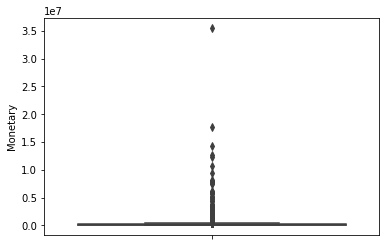

In [48]:
sns.boxplot(y='Monetary',data=RFMScore)

In [49]:
from sklearn.preprocessing import StandardScaler
scaled_features = df.copy()
 
col_names = ['Recency', ' Frequency','Monetary']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
 
scaled_features[col_names] = features
print(scaled_features)

      CustomerID   Recency   Frequency  Monetary
0            2.0 -0.886877    0.383795  0.377669
1            3.0 -0.161877   -0.284135  0.031987
2            4.0 -0.737904   -0.090220 -0.062268
3            5.0  2.162093   -0.331537 -0.219344
4            6.0 -0.559137   -0.038510 -0.091191
...          ...       ...         ...       ...
4344      4368.0  1.834354   -0.357392 -0.244423
4345      4369.0  0.870999   -0.370320 -0.255746
4346      4370.0 -0.837219   -0.344465 -0.239194
4347      4371.0 -0.886877    2.848672  0.059058
4348      4372.0 -0.489617   -0.098839  0.038306

[4349 rows x 4 columns]


In [50]:
scaled_features

,CustomerID,Recency,Frequency,Monetary
0,2.0,-0.886877,0.383795,0.377669
1,3.0,-0.161877,-0.284135,0.031987
2,4.0,-0.737904,-0.090220,-0.062268
3,5.0,2.162093,-0.331537,-0.219344
4,6.0,-0.559137,-0.038510,-0.091191
...,...,...,...,...
4344,4368.0,1.834354,-0.357392,-0.244423
4345,4369.0,0.870999,-0.370320,-0.255746
4346,4370.0,-0.837219,-0.344465,-0.239194
4347,4371.0,-0.886877,2.848672,0.059058


In [52]:
df2=df1.iloc[:,1:]
df2

,Recency,Frequency,Monetary
0,-0.886877,0.383795,0.377669
1,-0.161877,-0.284135,0.031987
2,-0.737904,-0.090220,-0.062268
3,2.162093,-0.331537,-0.219344
4,-0.559137,-0.038510,-0.091191
...,...,...,...
4344,1.834354,-0.357392,-0.244423
4345,0.870999,-0.370320,-0.255746
4346,-0.837219,-0.344465,-0.239194
4347,-0.886877,2.848672,0.059058


In [53]:
from sklearn.cluster import KMeans
sum_of_sq_dist={}
for i in range(2,25):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300)
    km=km.fit(df2)
    sum_of_sq_dist[i]=km.inertia_

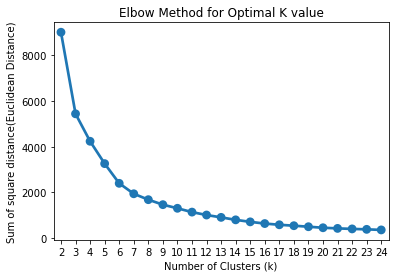

In [54]:
#Visualisation for Elbow Method
sns.pointplot(x=list(sum_of_sq_dist.keys()),
             y=list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of square distance(Euclidean Distance)')
plt.title('Elbow Method for Optimal K value')
plt.show()

In [55]:
km=KMeans(n_clusters=4,init='k-means++',max_iter=300)

In [107]:
y_kmeans=km.fit_predict(df1)

In [108]:
y_kmeans

array([3, 3, 3, ..., 2, 2, 2])

In [78]:
RFMScore.Cluster.unique()

array([1, 3, 0, 2])

In [79]:
#Centroid of each cluster
centroid_df=RFMScore.groupby('Cluster')[['Recency',' Frequency','Monetary','CustomerID']].agg({'Recency':'mean',
                                                                                             ' Frequency':'mean',
                                                                                             'Monetary':'mean',
                                                                                             'CustomerID':'nunique'}).reset_index()

In [71]:
centroid_df

,Cluster,Recency,Frequency,Monetary,CustomerID
0,0,95.913204,84.313019,187353.462604,1083
1,1,92.520947,86.598361,251945.296995,1098
2,2,93.336440,93.837838,204705.616962,1073
3,3,91.458447,106.937900,274905.274886,1095


In [72]:
RFMScore.to_excel('Final_output.xlsx')